In [31]:
import pandas as pd
import os
import datetime as dt

import statsmodels.api as sm
#from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf,pacf_yw,pacf_ols

In [10]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
print(df_mean.shape)
df_mean.head()

(1060704, 2)


,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [11]:
df_mean1 = df_mean[(df_mean.index > dt.datetime(2018,3,1)) & (df_mean.index < dt.datetime(2018,6,1))]
df_mean2 = df_mean[(df_mean.index > dt.datetime(2019,5,1))]
df_mean3 = df_mean[(df_mean.index > dt.datetime(2018,12,1))]
df_mean4 = df_mean[(df_mean.index > dt.datetime(2018,10,1))]

In [12]:
#exchange NaNs by -1 as else plot_(p)acf not possible

df_mean1.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean2.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean3.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)
df_mean4.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [5]:
plot_acf(df_mean1.CO2E_EMISSIONS_FACTOR,lags=10000);

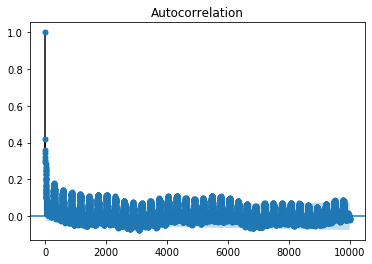

In [6]:
plot_acf(df_mean2.CO2E_EMISSIONS_FACTOR,lags=10000);

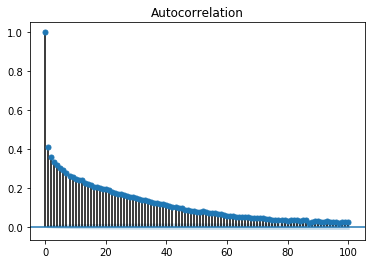

In [13]:
#note: the fact that NaNs were replaced by -1 appears to play a significant role in acf
plot_acf(df_mean3.CO2E_EMISSIONS_FACTOR,lags=100);

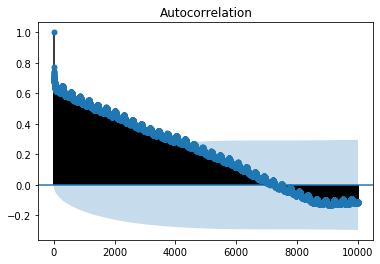

In [8]:
#note: the fact that NaNs were replaced by -1 appears to play a significant role in acf
plot_acf(df_mean4.CO2E_EMISSIONS_FACTOR,lags=10000);

In [15]:
df5 = df_mean3
df5["CO2_diff1"] = df5.CO2E_EMISSIONS_FACTOR - df5.CO2E_EMISSIONS_FACTOR.shift(1)
df5.dropna(inplace=True)
df5.head()

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,CO2E_EMISSIONS_FACTOR,CO2_diff1
2019-08-01 03:50:00,79.17710,0.456409,0.076068
2019-08-01 03:45:00,85.14416,0.573436,0.117028
2019-08-01 03:40:00,84.78689,0.573436,0.000000
2019-08-01 03:35:00,84.78346,0.573436,0.000000
2019-08-01 03:30:00,85.51143,0.573436,0.000000


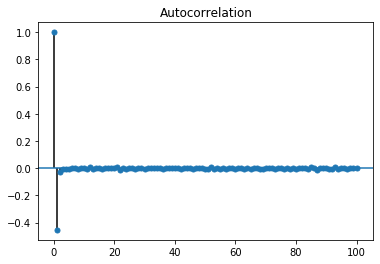

In [39]:
plot_acf(df5.CO2_diff1,lags=100);  #this suggests a MA(1) process

In [36]:

pacf_yw(df5.CO2_diff1,nlags=40)

array([ 1.        , -0.45337083, -0.29192237, -0.21152287, -0.16264817,
       -0.13298003, -0.10442422, -0.08615322, -0.07528358, -0.06711353,
       -0.06065304, -0.06560342, -0.04646816, -0.04393012, -0.04068765,
       -0.03481139, -0.03448837, -0.03337033, -0.03376494, -0.03357776,
       -0.03198766, -0.01738206, -0.02419804, -0.01936053, -0.02136706,
       -0.0190372 , -0.01735715, -0.01969371, -0.01966542, -0.01511793,
       -0.01603814, -0.01322151, -0.01382557, -0.01386353, -0.01108245,
       -0.00906011, -0.01464459, -0.01358947, -0.01287561, -0.00946192,
       -0.00893735])

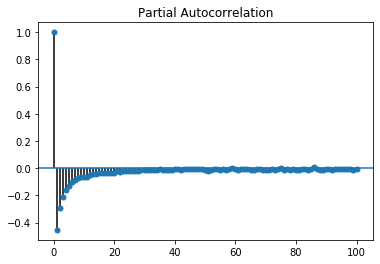

In [33]:
plot_pacf(df5.CO2_diff1,lags=100); #might be typical for an MA1 process

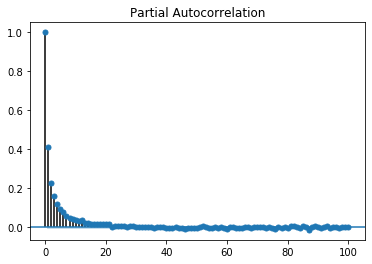

In [14]:
plot_pacf(df_mean3.CO2E_EMISSIONS_FACTOR,lags=100);

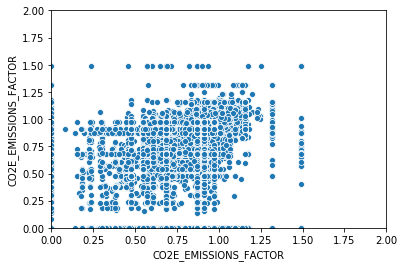

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.scatterplot(df_mean1.CO2E_EMISSIONS_FACTOR.shift(1), df_mean1.CO2E_EMISSIONS_FACTOR)
fig.set_xlim(0,2)
fig.set_ylim(0,2)
plt.figure;

In [8]:
df_DUID_CO2_price2 = df_DUID_CO2_price[(df_DUID_CO2_price.index > dt.datetime(2018,5,15)) &
                                       (df_DUID_CO2_price.index < dt.datetime(2018,6,1))]
df_DUID_CO2_price2.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-05-31 23:55:00,72.54360,0.605537,0.59672
2018-05-31 23:50:00,70.32848,0.912643,0.89508
2018-05-31 23:45:00,72.52576,0.908518,0.89508
2018-05-31 23:40:00,82.87810,0.608429,0.59672
2018-05-31 23:35:00,135.00004,0.694855,0.59672
